In [ ]:
## Disease Condition prediction based on drug reviews

In this project, we will classify the condition of patients using the reviews of the drugs given by patients using drug reviews dataset available in [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29).

## Importing libraries

In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
!pip install BeautifulSoup4 

In [3]:
str1="I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."


lst = [str1]
lst

['I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.']

In [4]:
import nltk
import sklearn
import bs4
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The bs4 version is {}.'.format(bs4.__version__))

The nltk version is 3.7.
The scikit-learn version is 1.2.2.
The bs4 version is 4.12.2.


In [5]:
df=pd.read_csv('data\drugsComTrain_raw.csv')

In [6]:
df.to_csv('data/drugsComTrain.csv',index=False)

In [7]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [10]:
df.condition.value_counts().shape

(884,)

In [11]:
top_conditions.sum()

NameError: name 'top_conditions' is not defined

In [12]:
null_counts = df.isnull().sum()
null_counts

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [13]:
# Assuming you have a DataFrame named df

# Remove rows with null values in the "condition" column
df = df.dropna(subset=['condition'])

# Now, df does not contain rows with null values in the "condition" column


In [14]:
df = df.dropna()

In [15]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [16]:
df.condition.value_counts().shape

(884,)

In [17]:
##df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [18]:
all_conditions = df['condition'].unique()
df_train = df[df['condition'].isin(all_conditions)]


In [19]:
df.shape

(160398, 7)

In [20]:
df_train.shape

(160398, 7)

In [21]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

In [22]:
#plots

In [23]:
X.head()

,condition,review
0,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,ADHD,"""My son is halfway through his fourth week of ..."
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
4,Opiate Dependence,"""Suboxone has completely turned my life around..."


## data preprocessing

In [24]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [25]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [26]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [27]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\jilan\AppData\Local\Temp\ipykernel_20584\999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [28]:
X.head()

,condition,review
0,Left Ventricular Dysfunction,"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"
1,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
4,Opiate Dependence,"Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin."


### What are stopwords ?

Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

The most common words used in a text are **“the”, “is”, “in”, “for”, “where”, “when”, “to”, “at”** etc.

In [29]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [30]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization
Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [31]:
#from IPython.display import Image
#Image(filename='stem.JPG')

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [33]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [34]:
from nltk.stem import WordNetLemmatizer
import zipfile

In [35]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [43]:
'''import nltk
nltk.download('omw-1.4')'''

KeyboardInterrupt: 

In [36]:
from bs4 import BeautifulSoup
import re

In [37]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [38]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\jilan\AppData\Local\Temp\ipykernel_20584\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [39]:
X.head()

,condition,review,review_clean
0,Left Ventricular Dysfunction,"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil",side effect take combination bystolic mg fish oil
1,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.",son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly hour drive home school vacation unusual called doctor monday morning said stick day see school getting morning last two day problem free much agreeable ever le emotional good thing le cranky remembering thing overall behavior better tried many different medication far effective
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately first day period instruction said period lasted two week taking second pack two week third pack thing got even worse third period lasted two week end third week still daily brown discharge positive side side effect idea period free tempting ala
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch",first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch
4,Opiate Dependence,"Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent 

## Creating features and Target Variable

In [40]:
X_feat=X['review_clean']
y=X['condition']

In [41]:
label_counts = df['condition'].value_counts()
selected_labels = label_counts[label_counts > 5900].index #50 is for most occurred 50 medical conditions.
filtered_df = df[df['condition'].isin(selected_labels)]

filtered_df['review_clean'] = filtered_df['review'].apply(review_to_words)


X_filtered = filtered_df['review_clean']  # Assuming 'review_clean' is your feature column
y_filtered = filtered_df['condition']
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=0
)

C:\Users\jilan\AppData\Local\Temp\ipykernel_20584\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
C:\Users\jilan\AppData\Local\Temp\ipykernel_20584\2484311030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['review_clean'] = filtered_df['review'].apply(review_to_words)


In [42]:
stratify=y_filtered,

In [43]:
y=filtered_df['condition']

In [44]:
print(filtered_df.columns)


Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'review_clean'],
      dtype='object')


In [45]:
y.values.reshape(1,-1)
y

2         Birth Control
3         Birth Control
9         Birth Control
11        Depression   
14        Birth Control
22        Birth Control
31        Depression   
32        Pain         
37        Pain         
44        Depression   
52        Pain         
59        Birth Control
60        Anxiety      
61        Birth Control
62        Pain         
63        Birth Control
64        Birth Control
67        Depression   
68        Birth Control
74        Birth Control
75        Birth Control
77        Birth Control
81        Depression   
82        Birth Control
83        Birth Control
90        Birth Control
96        Depression   
97        Birth Control
107       Anxiety      
108       Pain         
113       Birth Control
114       Anxiety      
115       Anxiety      
117       Birth Control
118       Birth Control
122       Birth Control
123       Birth Control
127       Birth Control
133       Birth Control
138       Birth Control
139       Birth Control
143       Depres

In [46]:
#............................no need to execute.....................!!!!!
#X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=0)

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [48]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [49]:
count_train

<39924x17881 sparse matrix of type '<class 'numpy.int64'>'
	with 1250243 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.metrics import classification_report


## Machine Learning Model : Passive Aggressive Classifier

In [51]:
all_labels = np.unique(y)

##
##
accuracy:   0.943
Classification Report:
               precision    recall  f1-score   support

      Anxiety       0.83      0.77      0.80      1146
Birth Control       0.99      0.99      0.99      5839
   Depression       0.86      0.89      0.87      1818
         Pain       0.94      0.94      0.94      1179

     accuracy                           0.94      9982
    macro avg       0.90      0.90      0.90      9982
 weighted avg       0.94      0.94      0.94      9982

Confusion matrix, without normalization


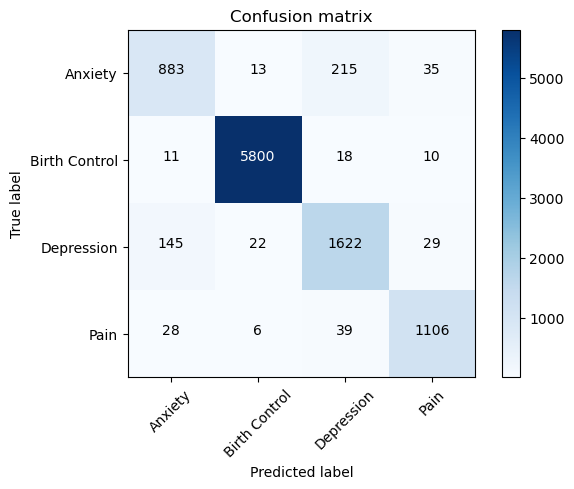

In [52]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.metrics import classification_report

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
print("##")
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("##")
print("accuracy:   %0.3f" % score)


classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)
cm = metrics.confusion_matrix(y_test, pred)
all_labels = np.unique(y)
plot_confusion_matrix(cm, classes=all_labels)


### TFIDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [54]:
###### Machine Learning Model : Naive Bayes

## Machine Learning Model TFIDF

In [55]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

# cm = metrics.confusion_matrix(y_test, pred)
# all_labels = np.unique(y)
# plot_confusion_matrix(cm, classes=all_labels)

accuracy:   0.945
Classification Report:
               precision    recall  f1-score   support

      Anxiety       0.82      0.81      0.81      1146
Birth Control       0.99      0.99      0.99      5839
   Depression       0.87      0.89      0.88      1818
         Pain       0.94      0.94      0.94      1179

     accuracy                           0.95      9982
    macro avg       0.91      0.91      0.91      9982
 weighted avg       0.95      0.95      0.95      9982



## TFIDF: Bigrams

In [56]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

In [57]:
from sklearn.metrics import classification_report

accuracy:   0.962
Classification Report:
               precision    recall  f1-score   support

      Anxiety       0.89      0.85      0.87      1146
Birth Control       0.99      1.00      0.99      5839
   Depression       0.90      0.93      0.91      1818
         Pain       0.96      0.95      0.96      1179

     accuracy                           0.96      9982
    macro avg       0.94      0.93      0.93      9982
 weighted avg       0.96      0.96      0.96      9982

Confusion matrix, without normalization


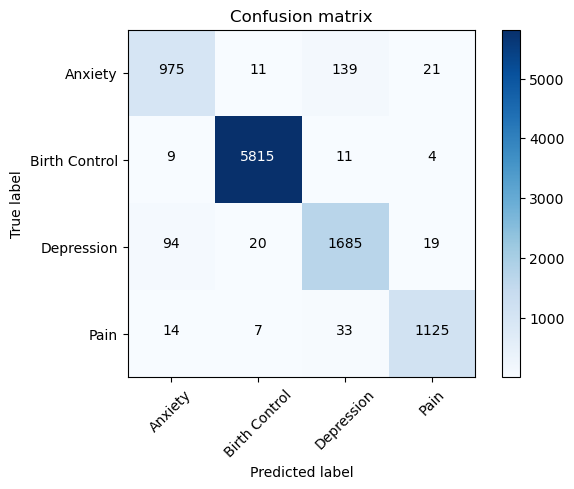

In [58]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

cm = metrics.confusion_matrix(y_test, pred)
all_labels = np.unique(y)
plot_confusion_matrix(cm, classes=all_labels)

## TFIDF : Trigrams

In [59]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

# cm = metrics.confusion_matrix(y_test, pred)
# all_labels = np.unique(y)
# plot_confusion_matrix(cm, classes=all_labels)

accuracy:   0.965
Classification Report:
               precision    recall  f1-score   support

      Anxiety       0.91      0.86      0.88      1146
Birth Control       0.99      1.00      0.99      5839
   Depression       0.91      0.94      0.92      1818
         Pain       0.96      0.95      0.96      1179

     accuracy                           0.96      9982
    macro avg       0.94      0.94      0.94      9982
 weighted avg       0.96      0.96      0.96      9982



In [60]:
from sklearn.metrics import classification_report

# Assuming you have the true labels y_test and predicted labels pred
classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)


Classification Report:
               precision    recall  f1-score   support

      Anxiety       0.91      0.86      0.88      1146
Birth Control       0.99      1.00      0.99      5839
   Depression       0.91      0.94      0.92      1818
         Pain       0.96      0.95      0.96      1179

     accuracy                           0.96      9982
    macro avg       0.94      0.94      0.94      9982
 weighted avg       0.96      0.96      0.96      9982



In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the true labels y_test and predicted labels pred
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

# Print the metrics
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")


Weighted Precision: 0.9646684866055402
Weighted Recall: 0.9647365257463434
Weighted F1 Score: 0.9645426186338223


## Most important Features

In [62]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Birth Control')

Birth Control sick blood 3.2085810364248304
Birth Control favor ther 4.430714104447259
Birth Control debilitating gad 4.676196879211794
Birth Control june got 4.828016046490995
Birth Control living total 5.185506840108855
Birth Control eating habbits 6.087833018845348
Birth Control like absolutely 6.511280403476932
Birth Control dramatic loss 6.755034049063269
Birth Control drain toxin 7.039468511789855
Birth Control advised got 7.550480981396439


In [63]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression sex anymore 2.9222184801255473
Depression painkiller prior 2.980095365687864
Depression october depression 3.0643411249987933
Depression slept course 3.1499635116153266
Depression heat massage 3.731647070327227
Depression able continue 4.790334681988171
Depression felt intolerable 4.979454208748827
Depression gone dont 5.280240688423879
Depression blessing course 6.1544932905998255
Depression ocd type 11.686402356451588


In [64]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Anxiety')

Anxiety come sort 2.590956259671383
Anxiety buspar acute 2.775310440154375
Anxiety worked job 2.909707395607703
Anxiety behaviour worse 2.9298074322408034
Anxiety hip especially 2.9567781773184305
Anxiety panic case 3.336964258363858
Anxiety form bleeding 4.329430218615897
Anxiety combination ssri 5.317530958686572
Anxiety flu methadone 6.428510724183569
Anxiety blow belief 13.318260770176877


In [65]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Pain')

Pain disc moderate 2.0845640347090644
Pain yaz heard 2.240406855262603
Pain zero force 2.318962393363168
Pain sooo mad 2.324909158655951
Pain underwear really 2.336998290285895
Pain unlike adderall 2.4864343470598214
Pain going yasmin 2.499812677415985
Pain chronic neuropathic 2.9253305906846827
Pain pharmacy actually 3.747720503209894
Pain period normalize 4.146182448823898


## Sample Predictions

In [66]:
X.tail()

,condition,review,review_clean
161292,Alcohol Dependence,"I wrote my first report in Mid-October of 2014. I have not had any alcohol at all since that post, have reduced my dosage to 1 pill first thing in the morning. I am a very social person, and entertained a great deal. I was very very worried that I would relapse if faced with the availability of alcohol. I have sailed through all my seasonal parties, early spring get togethers and weekly &quot;wings and beer&quot; with friends with not one slip. My husband and daughter are huge supporters. As I write this, I have various wines and liquors in my cabinet - serve to guests - and have no interest at all in consuming booze in any form. Again, I state that Campral saved my life.",wrote first report mid october alcohol since post reduced dosage pill first thing morning social person entertained great deal worried would relapse faced availability alcohol sailed seasonal party early spring get togethers weekly wing beer friend one slip husband daughter huge supporter write various wine liquor cabinet serve guest interest consuming booze form state campral saved life
161293,Nausea/Vomiting,I was given this in IV before surgey. I immediately became anxious and could not sit still . The PA said &quot;oh yes this happens sometimes&quot;. They had to give me Benadryl to calm me down. It was the worst experience I have had -out of control and jumpy.,given iv surgey immediately became anxious could sit still pa said oh yes happens sometimes give benadryl calm worst experience control jumpy
161294,Rheumatoid Arthritis,"Limited improvement after 4 months, developed bad rash and MD refused to continue medication.",limited improvement month developed bad rash md refused continue medication
161295,Underactive Thyroid,"I&#039;ve been on thyroid medication 49 years, I spent my first 38 on Synthroid and various t4 formulas, I could not stand the up and down of Synthroid, it never was steady. Every time I went to the Dr. It was adjusted, it could not regulate me and most Dr&#039;s. Just played with raising and lowering the mg levels. \r\nFinally a person I new told me I should see her Dr. I did, and that was the beginning of a beautiful relationship with Armour Thyroid. I&#039;ve never felt better, my bad symptoms went away, and I feel almost human. It holds me steady for longer periods. sometimes the patient knows best, regardless of what the blood tests say. Armour contains unknown ingredients that can&#039;t be isolated into a synthetic pill form, Armour is natural, and best.",thyroid medication year spent first synthroid various formula could stand synthroid never steady every time went dr adjusted could regulate dr played raising lowering mg level finally person new told see dr beginning beautiful relationship armour thyroid never felt better bad symptom went away feel almost human hold steady longer period sometimes patient know best regardless blood test say armour contains unknown ingredient isolated synthetic pill form armour natural best
161296,"Constipation, Chronic","I&#039;ve had chronic constipation all my adult life. Tried Linzess, it worked for a month then stopped. Doctor started me on Amitiza (24 mg) and it is a miracle. I&#039;ve been on for four months now. After a life of 7-10 days between bowel motions, I now go comfortably 3-4 times per week. No pain, very little gas. It&#039;s a miracle for me.",chronic constipation adult life tried linz worked month stopped doctor started amitiza mg miracle four month life day bowel motion go comfortably time per week pain little gas miracle


In [67]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [68]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [69]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [70]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="Anxiety":
        target="Anxiety"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Pain":
        target="Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: Pain
Top 3 Suggested Drugs:
OxyContin
OxyContin
Oxycodone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. 

In [71]:
df_testsent = predict_text(sentences)
df_testsent

,test_sent,prediction
0,tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation,Pain
1,third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap,Depression
2,got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine,Depression


In [72]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [73]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt really sick the first two weeks on this drug. But you HAVE to give the drug time. For me, I didn&#039;t really start noticing the drugs positive effects for about two months. I took Zoloft before this and felt like it made me too tired and absent-minded. Luckily, Lexapro doesn&#039;t seem to have this effect (although I do drink caffeinated drinks). I like Lexapro not only because my anxiety and depression is completely gone, but I feel like I can finally handle everything in my life now (I&#039;m a working full-time college student). I highly recommend this drug."]))
test[0]

'Depression'